<a href="https://colab.research.google.com/github/gopalkalpande/Practice-AI/blob/master/time_series_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas_datareader.data as web

In [0]:
stock_name = 'INFY'
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2018,12,31)
data = web.DataReader(stock_name, "yahoo", start, end)
data.drop(['Volume', 'Adj Close'], 1, inplace=True)

In [3]:

print(data.head())
print('\n Data Types:')
print(data.dtypes)

               High      Low     Open    Close
Date                                          
2013-01-02  5.44500  5.32000  5.43625  5.35750
2013-01-03  5.47875  5.36375  5.38250  5.43375
2013-01-04  5.36750  5.29250  5.36750  5.33500
2013-01-07  5.41500  5.33500  5.33750  5.41125
2013-01-08  5.35000  5.30375  5.31125  5.31500

 Data Types:
High     float64
Low      float64
Open     float64
Close    float64
dtype: object


In [4]:
data.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1510, freq=None)

In [5]:
ts = data['Close'] 
ts.head(10)



Date
2013-01-02    5.35750
2013-01-03    5.43375
2013-01-04    5.33500
2013-01-07    5.41125
2013-01-08    5.31500
2013-01-09    5.33500
2013-01-10    5.49375
2013-01-11    6.52750
2013-01-14    6.49125
2013-01-15    6.37500
Name: Close, dtype: float64

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


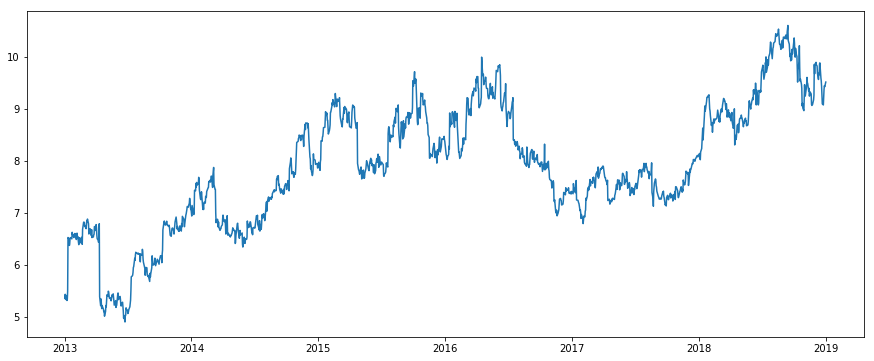

In [6]:
plt.plot(ts)

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

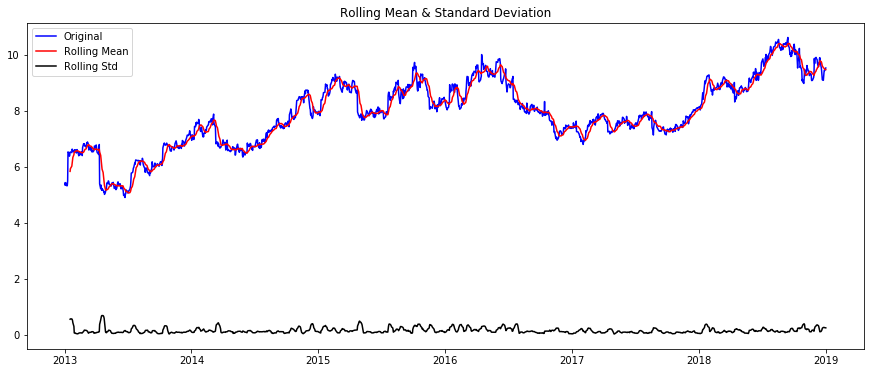

Results of Dickey-Fuller Test:
Test Statistic                   -2.467311
p-value                           0.123632
#Lags Used                        0.000000
Number of Observations Used    1509.000000
Critical Value (1%)              -3.434691
Critical Value (5%)              -2.863457
Critical Value (10%)             -2.567791
dtype: float64


In [8]:
test_stationarity(ts)

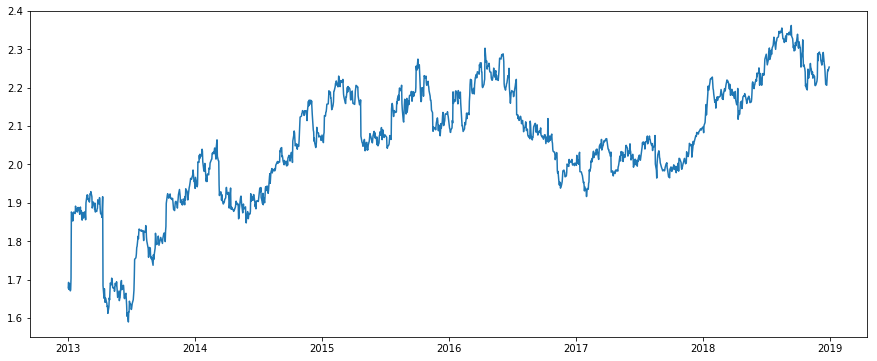

In [77]:
# ESTIMATING AND ELEMINATING TREND 

ts_log = np.log(ts)
plt.plot(ts_log)

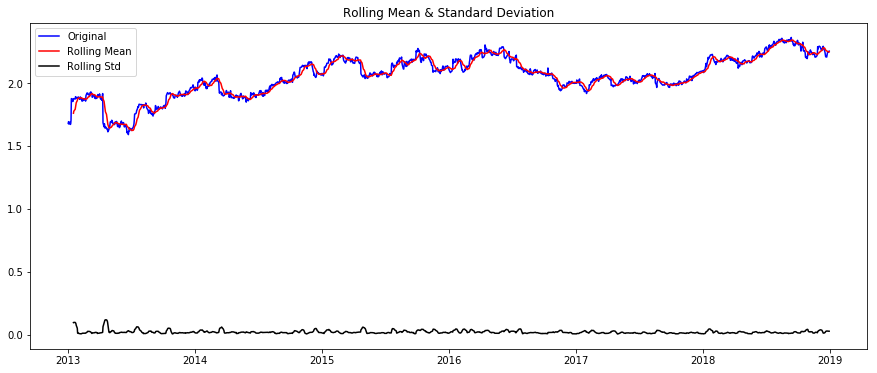

Results of Dickey-Fuller Test:
Test Statistic                   -2.607083
p-value                           0.091542
#Lags Used                        0.000000
Number of Observations Used    1509.000000
Critical Value (1%)              -3.434691
Critical Value (5%)              -2.863457
Critical Value (10%)             -2.567791
dtype: float64


In [78]:
ts_log.dropna(inplace=True)
test_stationarity(ts_log)

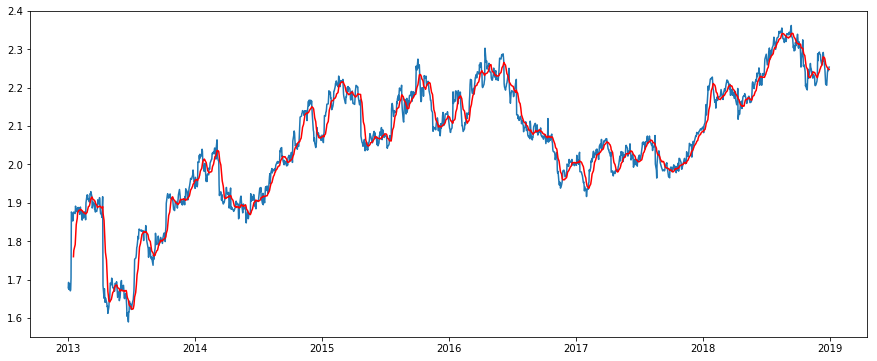

In [11]:
# moving average

moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')


In [12]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2013-01-02         NaN
2013-01-03         NaN
2013-01-04         NaN
2013-01-07         NaN
2013-01-08         NaN
2013-01-09         NaN
2013-01-10         NaN
2013-01-11         NaN
2013-01-14         NaN
2013-01-15         NaN
2013-01-16         NaN
2013-01-17    0.114772
Name: Close, dtype: float64

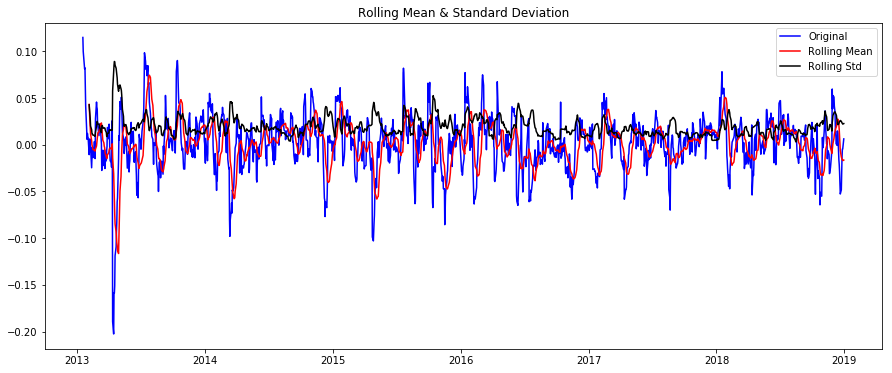

Results of Dickey-Fuller Test:
Test Statistic                -1.206368e+01
p-value                        2.436404e-22
#Lags Used                     7.000000e+00
Number of Observations Used    1.491000e+03
Critical Value (1%)           -3.434743e+00
Critical Value (5%)           -2.863480e+00
Critical Value (10%)          -2.567803e+00
dtype: float64


In [13]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

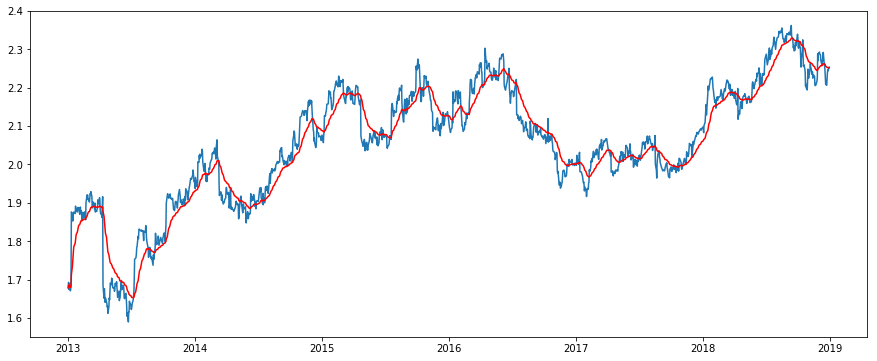

In [14]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

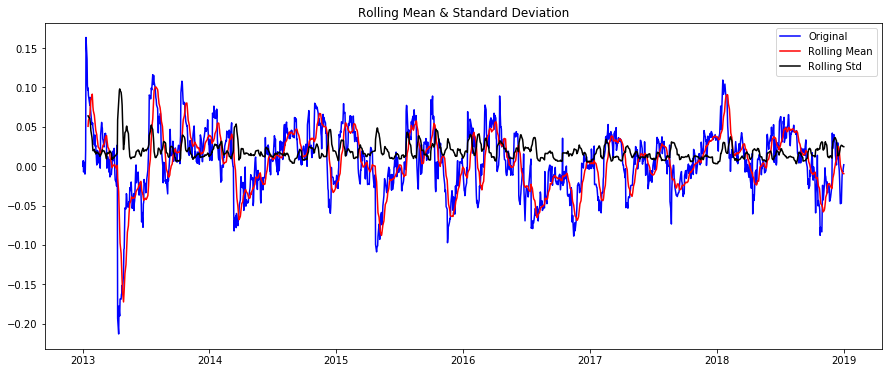

Results of Dickey-Fuller Test:
Test Statistic                -7.799667e+00
p-value                        7.552215e-12
#Lags Used                     0.000000e+00
Number of Observations Used    1.509000e+03
Critical Value (1%)           -3.434691e+00
Critical Value (5%)           -2.863457e+00
Critical Value (10%)          -2.567791e+00
dtype: float64


In [15]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

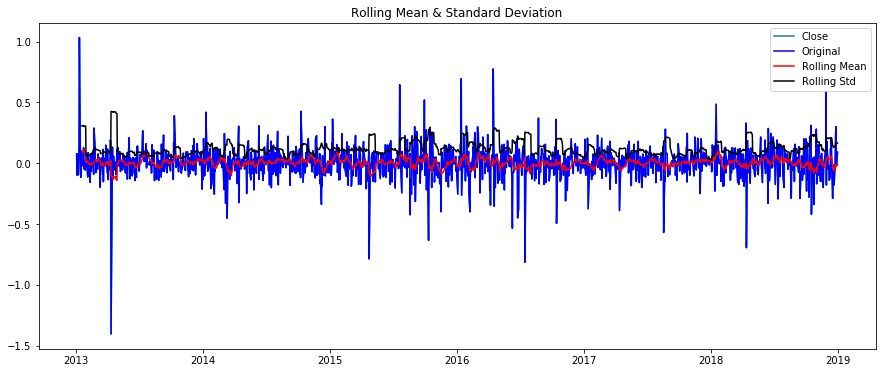

Results of Dickey-Fuller Test:
Test Statistic                  -40.143401
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1508.000000
Critical Value (1%)              -3.434694
Critical Value (5%)              -2.863459
Critical Value (10%)             -2.567791
dtype: float64


In [16]:
ts_diff = ts - ts.shift()
plt.plot(ts_diff)
ts_diff.dropna(inplace=True)
test_stationarity(ts_diff)


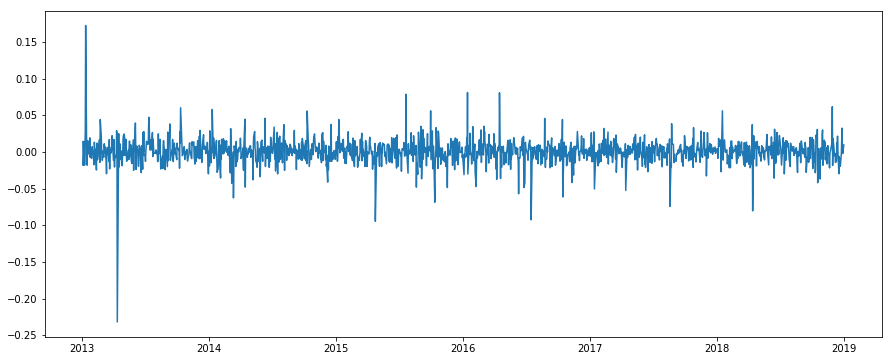

In [17]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

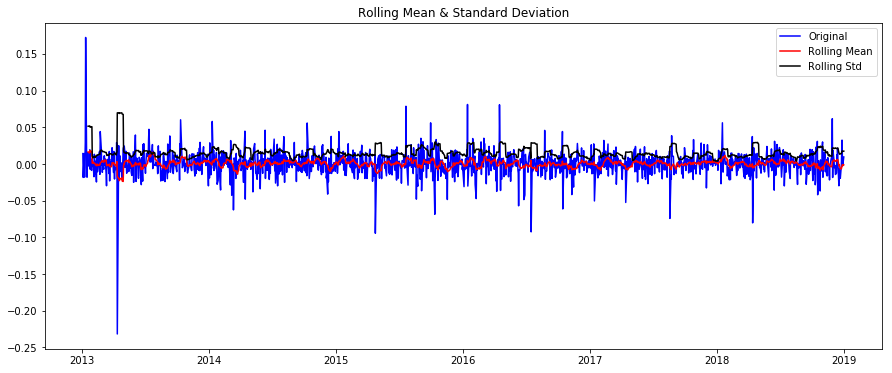

Results of Dickey-Fuller Test:
Test Statistic                  -28.918288
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1507.000000
Critical Value (1%)              -3.434697
Critical Value (5%)              -2.863460
Critical Value (10%)             -2.567792
dtype: float64


In [18]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [0]:
#ts_log_diff

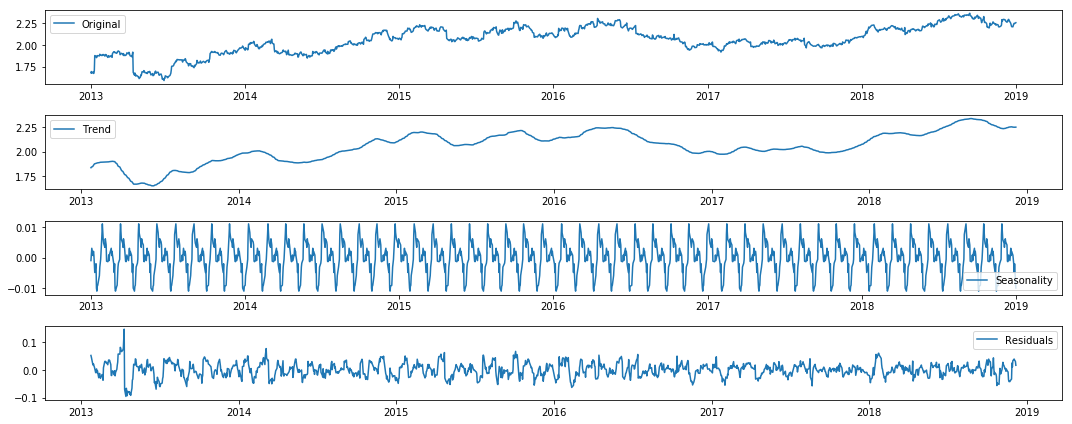

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

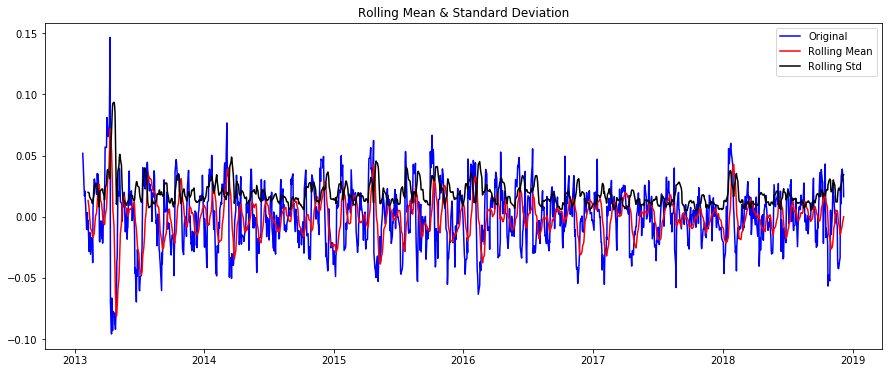

Results of Dickey-Fuller Test:
Test Statistic                -1.056420e+01
p-value                        7.590940e-19
#Lags Used                     2.300000e+01
Number of Observations Used    1.456000e+03
Critical Value (1%)           -3.434849e+00
Critical Value (5%)           -2.863527e+00
Critical Value (10%)          -2.567828e+00
dtype: float64


In [21]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [0]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [0]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

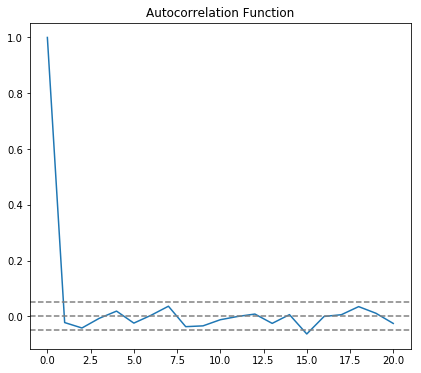

In [24]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

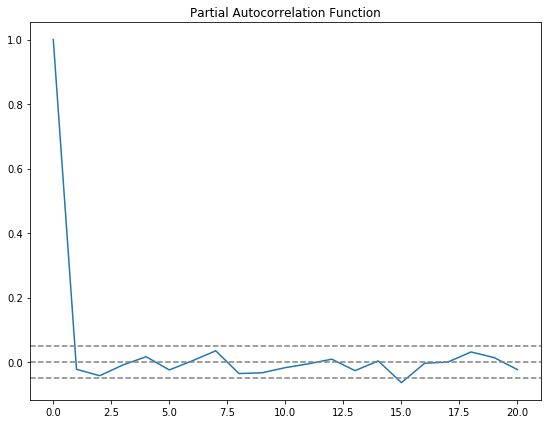

In [25]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [0]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.4413')

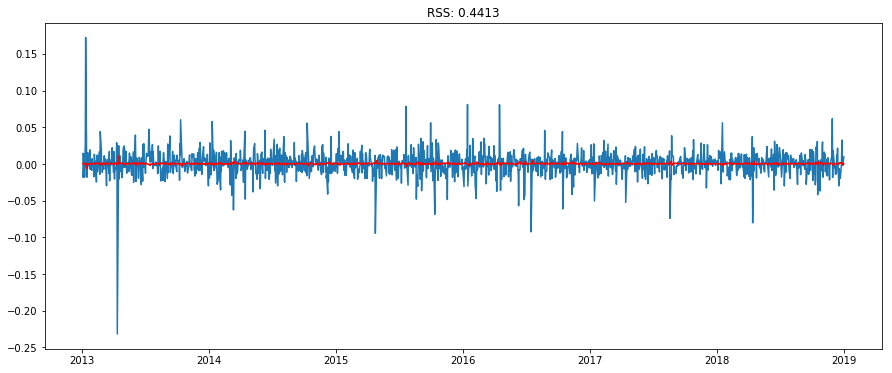

In [27]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.4413')

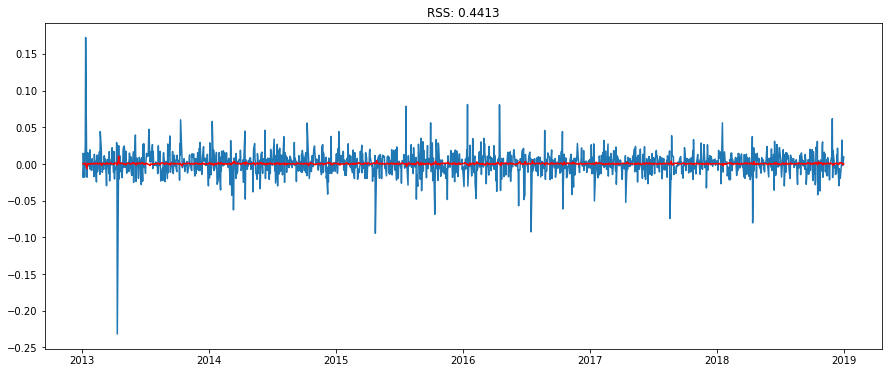

In [28]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

In [82]:

model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

SyntaxError: ignored

In [0]:
#ts_log

In [39]:
predictions_ARIMA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2013-01-03    0.000381
2013-01-04    0.000066
2013-01-07    0.000260
2013-01-08    0.000795
2013-01-09    0.000261
dtype: float64


In [40]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2013-01-03    0.000381
2013-01-04    0.000447
2013-01-07    0.000707
2013-01-08    0.001503
2013-01-09    0.001764
dtype: float64


In [41]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2013-01-02    1.678497
2013-01-03    1.678878
2013-01-04    1.678944
2013-01-07    1.679205
2013-01-08    1.680000
dtype: float64

Text(0.5, 1.0, 'RMSE: 1.2330')

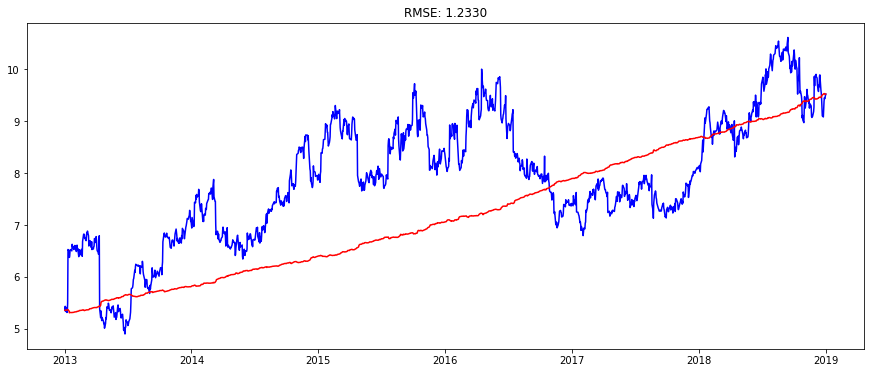

In [43]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts,'b')
plt.plot(predictions_ARIMA,'r')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))


In [45]:
ts.shape, predictions_ARIMA.shape

((1510,), (1510,))

In [46]:
my_pred = pd.DataFrame(columns=['pred', 'actual'])
my_pred['pred'] =predictions_ARIMA
my_pred['actual'] = ts
my_pred.head()

,pred,actual
Date,,
2013-01-02,5.357500,5.35750
2013-01-03,5.359539,5.43375
2013-01-04,5.359895,5.33500
2013-01-07,5.361291,5.41125
2013-01-08,5.365556,5.31500


In [51]:
my_pred.tail()

,pred,actual
Date,,
2018-12-24,9.517552,9.08
2018-12-26,9.530134,9.38
2018-12-27,9.528128,9.45
2018-12-28,9.517939,9.43
2018-12-31,9.518840,9.52


In [54]:
my_pred[1361:].shape

(149, 2)

In [55]:
my = my_pred[1361:]
my.head()

,pred,actual
Date,,
2018-05-30,8.985111,9.070
2018-05-31,8.993167,9.095
2018-06-01,8.993566,9.145
2018-06-04,8.995143,9.220
2018-06-05,8.994860,9.180


In [57]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
my.to_csv('/content/drive/My Drive/abc/Arima.csv', sep=',', encoding='utf-8')

In [0]:
my_pred.to_csv('/content/drive/My Drive/abc/Arima_all_data.csv', sep=',', encoding='utf-8')

In [60]:
lstm = pd.read_csv('/content/drive/My Drive/abc/LSTM_Stock_prediction_Close.csv')
lstm.head()

,Unnamed: 0,pred,actual
0,0,8.014532,8.418510
1,1,8.131971,8.544661
2,2,8.224032,8.589717
3,3,8.304104,8.679825
4,4,8.372955,8.814988


In [0]:
lstm_close = lstm.pred

In [64]:
my['lstm_close'] = 0
my.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,pred,actual,lstm_close
Date,,,
2018-05-30,8.985111,9.070,0
2018-05-31,8.993167,9.095,0
2018-06-01,8.993566,9.145,0
2018-06-04,8.995143,9.220,0
2018-06-05,8.994860,9.180,0


In [68]:
j = 0
for i in lstm_close:
    my['lstm_close'][j] = i
    j += 1
    
my.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,pred,actual,lstm_close
Date,,,
2018-05-30,8.985111,9.070,8.014532
2018-05-31,8.993167,9.095,8.131971
2018-06-01,8.993566,9.145,8.224032
2018-06-04,8.995143,9.220,8.304104
2018-06-05,8.994860,9.180,8.372955


Text(0.5, 1.0, 'Comparison of Prediction between ARIMA model and LSTM')

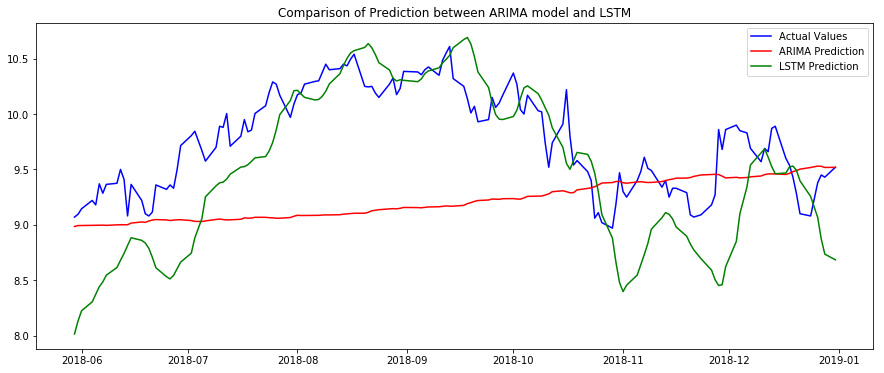

In [85]:
#predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(my['actual'],'b', label = 'Actual Values')
plt.plot(my['pred'],'r', label = 'ARIMA Prediction')
plt.plot(my['lstm_close'],'g', label = 'LSTM Prediction')
plt.legend()
plt.title('Comparison of Prediction between ARIMA model and LSTM')

In [86]:
from sklearn.metrics import mean_squared_error
mean_squared_error(my.pred, my.actual)

0.5765667201066372

# Auto ARIMA

In [93]:
!pip3 install pyramid-arima

     |████████████████████████████████| 604kB 6.5MB/s 


In [95]:
pip install statsmodels scipy

In [96]:
from pyramid.arima import auto_arima

ImportError: ignored

     |████████████████████████████████| 327kB 6.5MB/s 
     |████████████████████████████████| 174kB 44.9MB/s 
     |████████████████████████████████| 122kB 42.1MB/s 
